In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_day_data.csv')
mean_data = df.loc[:, ['open', 'close']].mean(axis=1)
df['mean_data']=mean_data
# dataset=df[['date','mean_data']]
dataset=df[['mean_data']]

In [74]:
dataset.head()

,mean_data
0,259.370
1,256.430
2,251.890
3,251.385
4,249.175


In [75]:
# dataset['lag1']=dataset['mean_data'].shift(1)
# dataset['lag2']=dataset['mean_data'].shift(2)
# dataset=dataset.dropna()
# dataset.head()

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
train=dataset.iloc[:-5]
test=dataset.iloc[-5:]
# model = SARIMAX(dataset, order=(1,1,1), seasonal_order=(1,1,1,5))
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,5))
sarima_model_fit = sarima_model.fit()

In [77]:
# dataset2 = dataset.diff().dropna()
# result = adfuller(dataset2)
# print(f"ADF Statistic: {result[0]}")
# print(f"p-value: {result[1]}")

<Figure size 1000x500 with 0 Axes>

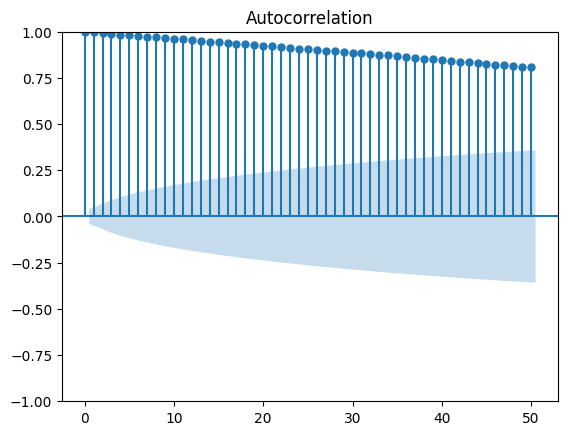

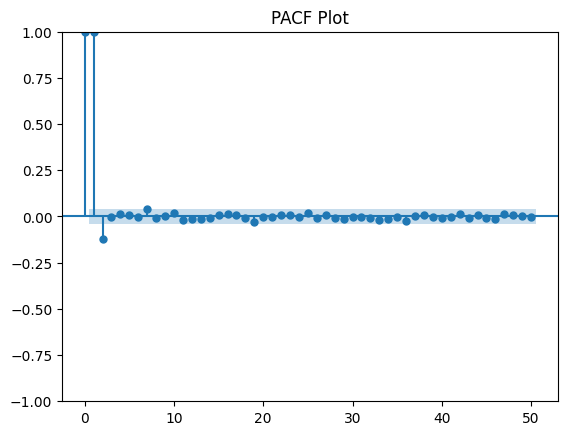

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plot_acf(dataset, lags=50)
plot_pacf(dataset, lags=50)
plt.title('ACF Plot')
plt.title('PACF Plot')
plt.show()

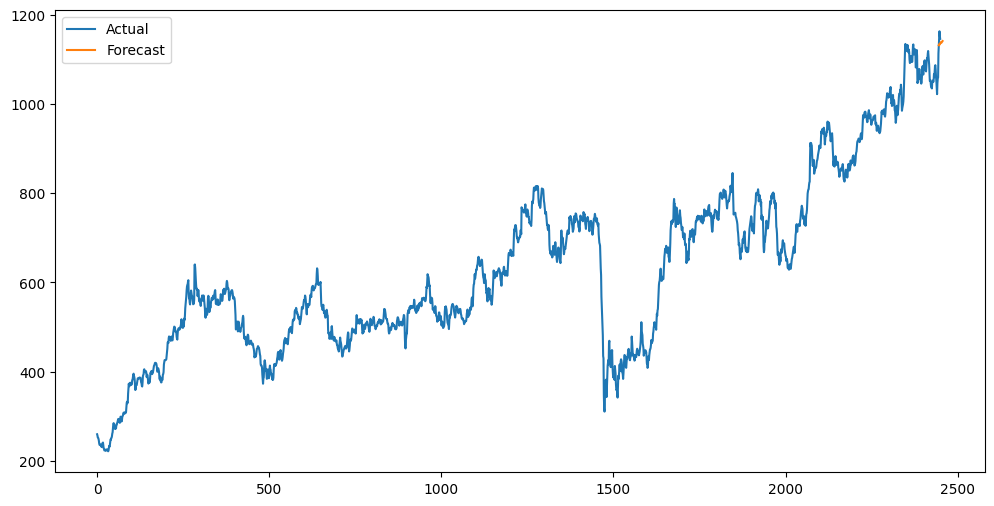

In [78]:
# model_fit = sarima_model.fit()
forecast = sarima_model_fit.forecast(steps=12)

# Visualize Predictions
plt.figure(figsize=(12,6))
plt.plot(dataset, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend(loc='best')
plt.show()